In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('advertising (1).csv')
df.sample(5)

,TV,Radio,Newspaper,Sales
7,120.2,19.6,11.6,13.2
86,76.3,27.5,16.0,12.0
83,68.4,44.5,35.6,13.6
160,172.5,18.1,30.7,16.4
165,234.5,3.4,84.8,16.9


In [13]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [14]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
df.duplicated().sum()

0

### EDA

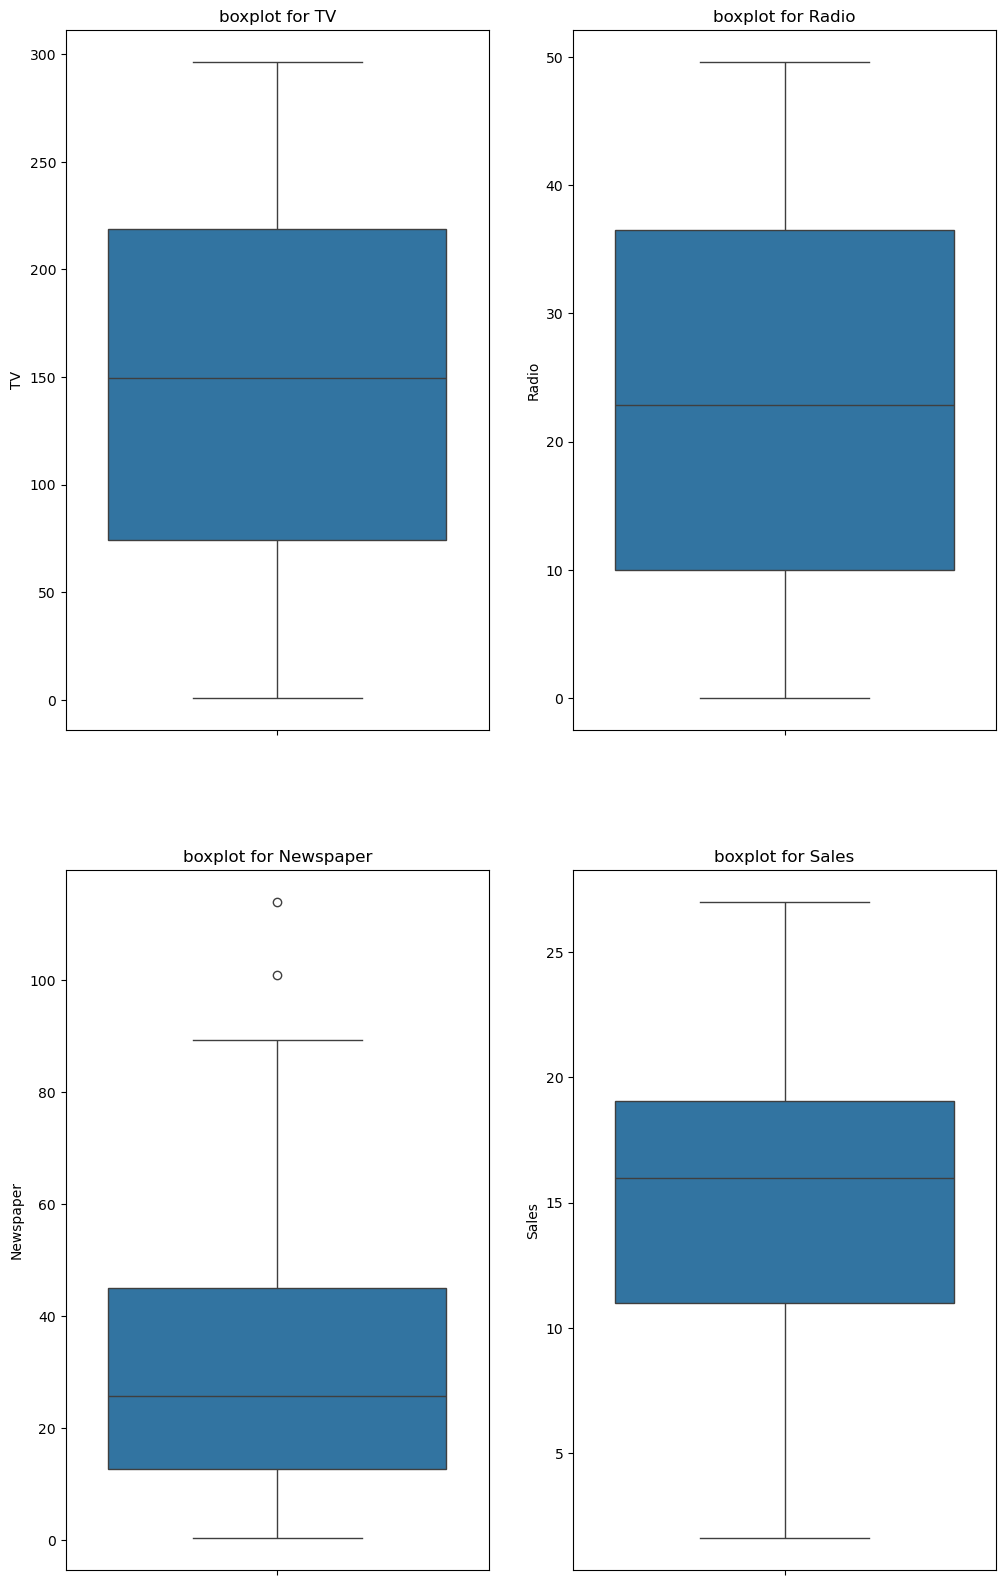

In [16]:
cols = ['TV','Radio','Newspaper','Sales']
plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[cols[i]])
    plt.title(f'boxplot for {cols[i]}')
plt.show()

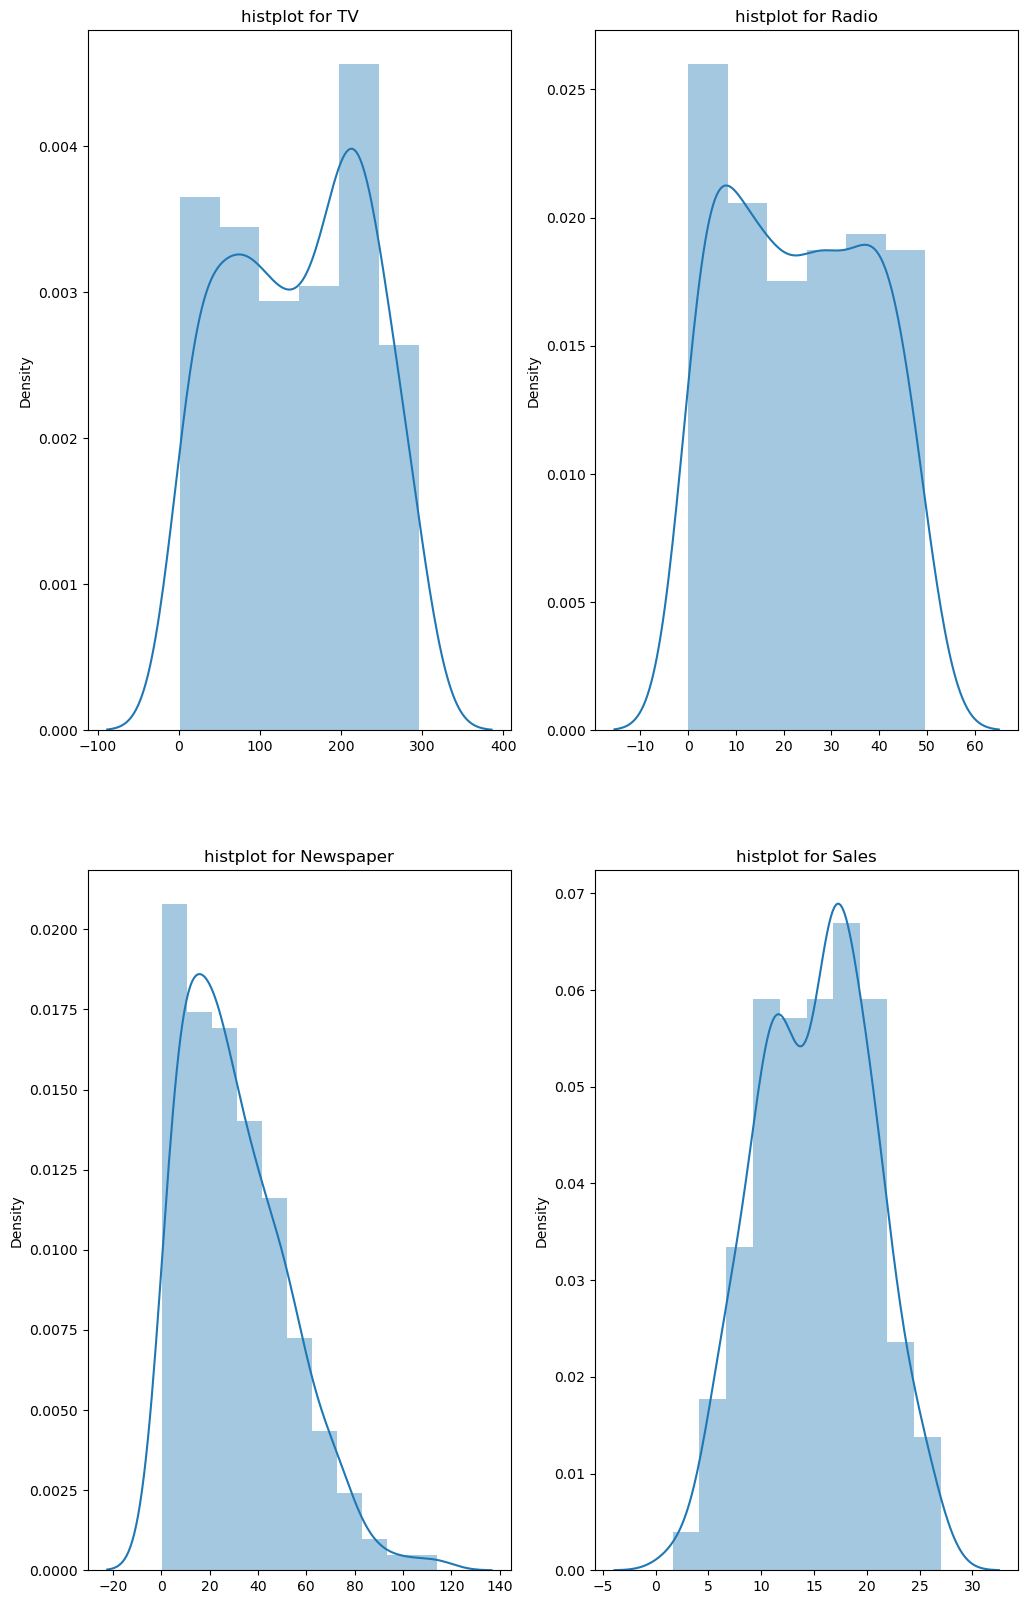

In [17]:
plt.figure(figsize=(12,20))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.distplot(x=df[cols[i]])
    plt.title(f'histplot for {cols[i]}')
plt.show()

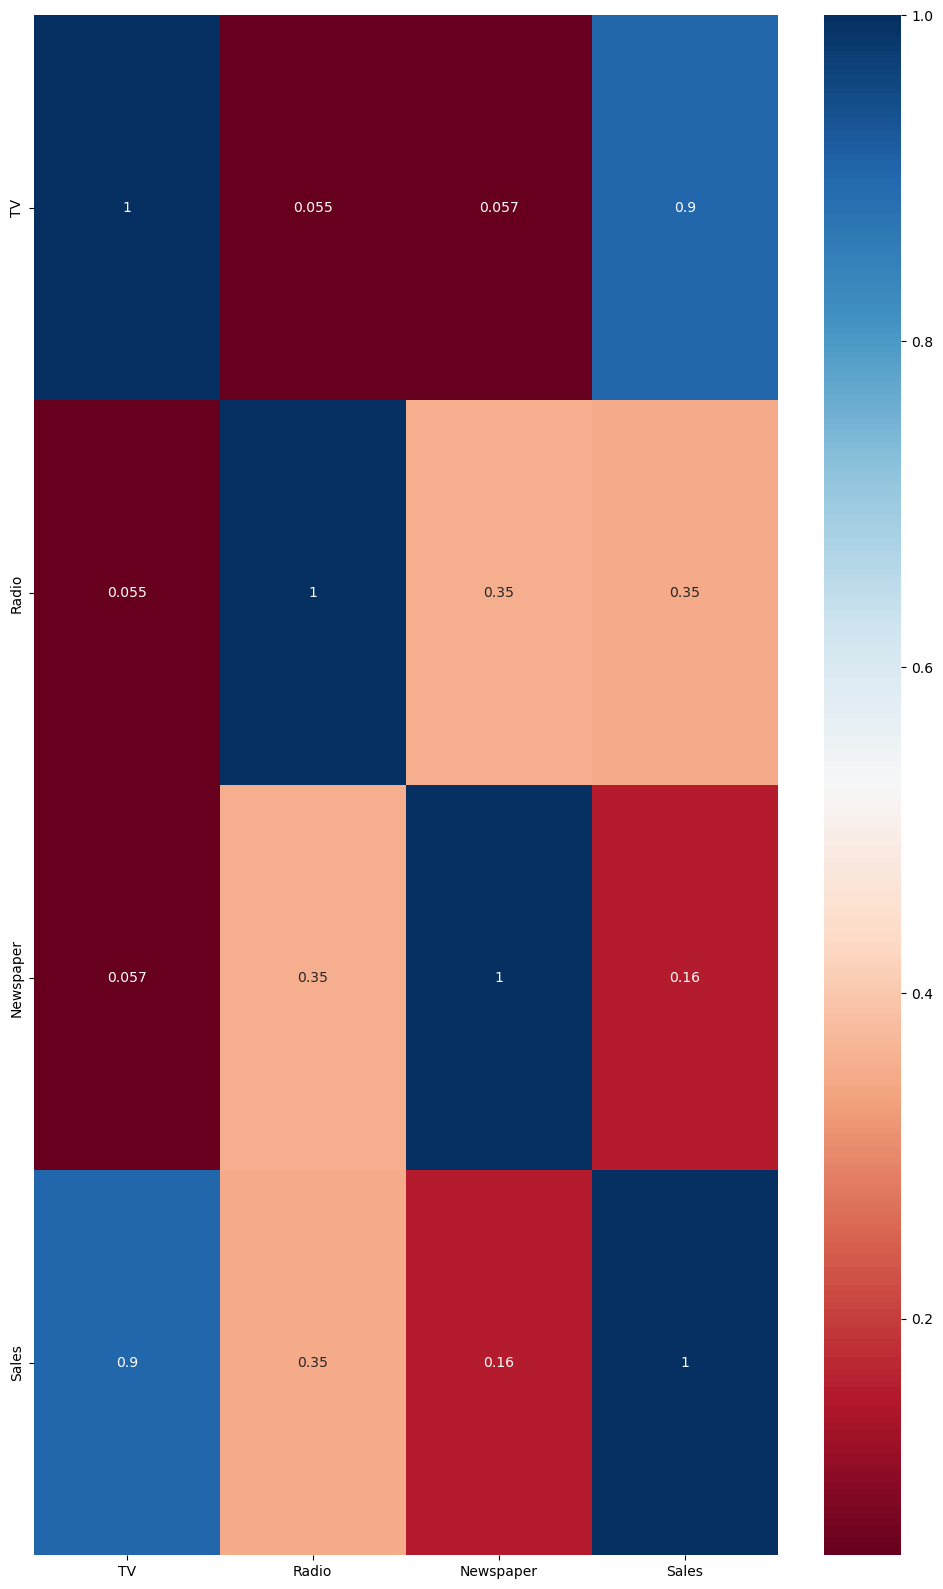

In [18]:
corr = df.corr()
plt.figure(figsize=(12,20))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### outliers

In [19]:
a = df.describe(percentiles = [0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
TV,0.7,5.387,7.790,8.594,149.75,286.048,289.720,292.907,296.4
Radio,0.0,0.399,1.290,1.497,22.90,48.900,49.000,49.400,49.6
Newspaper,0.3,0.999,1.798,2.197,25.75,75.018,79.312,89.515,114.0
Sales,1.6,4.784,5.300,5.597,16.00,24.721,25.400,25.507,27.0


In [21]:
cols_left_skewed = ['TV','Sales']
def left_outlier_treatment(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [23]:
df[cols_left_skewed] = df[cols_left_skewed].apply(left_outlier_treatment)

In [24]:
cols_right_skewed  = ['Newspaper']
def right_outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [25]:
df[cols_right_skewed] = df[cols_right_skewed].apply(right_outlier_treatment)

In [26]:
a = df.describe(percentiles = [0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
TV,5.387,5.39987,7.790,8.594,149.75,286.048,289.720,292.90700,296.400
Radio,0.000,0.39900,1.290,1.497,22.90,48.900,49.000,49.40000,49.600
Newspaper,0.300,0.99900,1.798,2.197,25.75,75.018,79.312,89.40115,89.515
Sales,4.784,4.79984,5.300,5.597,16.00,24.721,25.400,25.50700,27.000


### Select x and y

In [27]:
x = df.drop(['Sales'],axis=1)
y = df['Sales']
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [30]:
def eval_model(model,x_train,x_test,y_train,y_test,modelname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[modelname])
    return res

In [36]:
def eval_model_basic(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

### Linear regression

In [31]:
from sklearn.linear_model import LinearRegression

In [38]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(x_train, y_train)
y_pred = lr1.predict(x_test)
train_r2 = lr1.score(x_train, y_train)
test_r2 = lr1.score(x_test, y_test)

print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")


Train R2: 0.9002488180673814
Test R2: 0.9081393492589395


In [40]:
ypred_rf= lr1.predict(x_test)
res = pd.DataFrame({'Sales':y_test,
                   'Prediction':ypred_rf})
res.sample(10)

,Sales,Prediction
132,5.7,8.204064
122,16.6,17.082390
84,21.7,20.896274
174,16.5,17.087440
115,12.6,12.856536
158,7.3,9.658652
165,16.9,18.164342
126,6.6,9.695176
114,14.6,14.146935
98,25.4,24.957010
